Lab Assignment 6

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [6]:

df = pd.read_csv('historical_automobile_sales.csv')

# Display the first few rows of the DataFrame
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


### Q1. Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

Include the following on the plot

ticks on x- axis with all the years, to identify the years of recession
annotation for at least two years of recession
Title as Automobile Sales during Recession


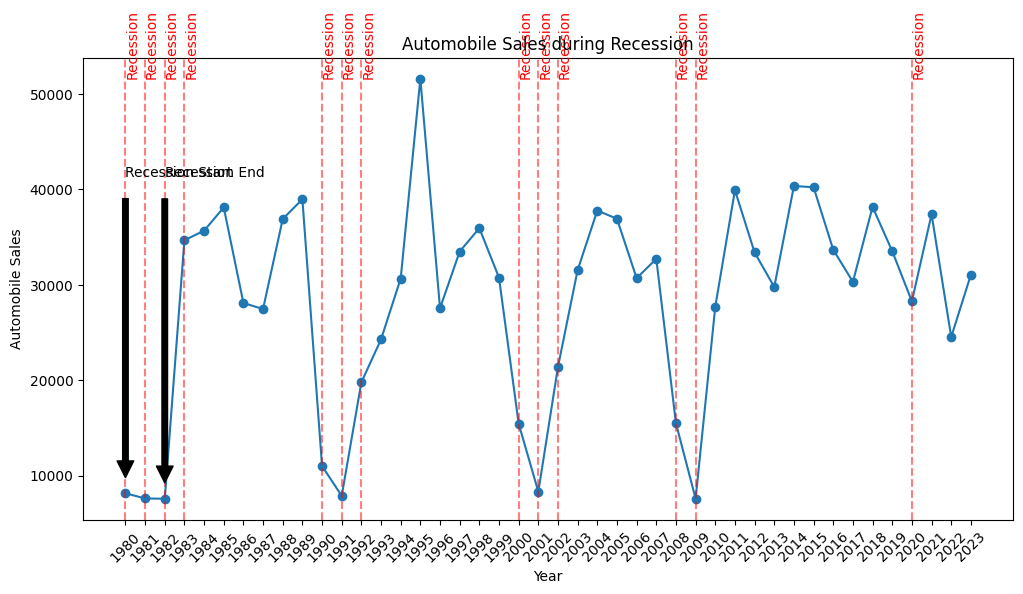

In [7]:
# Group the data by year and sum the automobile sales
sales_by_year = df.groupby('Year')['Automobile_Sales'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
sales_by_year.plot(kind='line', marker='o')

# Add title and labels
plt.title('Automobile Sales during Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')

# Add ticks on x-axis with all the years
plt.xticks(sales_by_year.index, rotation=45)

# Annotate years of recession
recession_years = df[df['Recession'] == 1]['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='r', linestyle='--', alpha=0.5)
    plt.text(year, sales_by_year.max(), 'Recession', rotation=90, verticalalignment='bottom', color='red')

# Annotate at least two years of recession
plt.annotate('Recession Start', xy=(1980, sales_by_year.loc[1980]), xytext=(1980, sales_by_year.max()*0.8),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Recession End', xy=(1982, sales_by_year.loc[1982]), xytext=(1982, sales_by_year.max()*0.8),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()